In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Dataset Overview

In [2]:
# read csv file
df_netflix = pd.read_csv('netflix_titles.csv')

In [3]:
# copy & show the dataframe
df_clean = df_netflix.copy()
df_clean.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [4]:
# data types
df_netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
# shape of dataframe
df_netflix.shape

(8807, 12)

## Identifying Missing Data

In [6]:
# number of rows missing in each column
df_netflix.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [7]:
# % of rows missing in each column
for column in df_netflix.columns:
    percentage = df_netflix[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

show_id: 0.0%
type: 0.0%
title: 0.0%
director: 29.91%
cast: 9.37%
country: 9.44%
date_added: 0.11%
release_year: 0.0%
rating: 0.05%
duration: 0.03%
listed_in: 0.0%
description: 0.0%


## Dealing with Missing Data

In [8]:
# Remove a column or a row with .drop(), .dropna() or .isnull()

# drop a column
df_netflix.drop('director', axis=1)

# drop a row
no_director = df_netflix[df_netflix['director'].isnull()].index
df_netflix.drop(no_director)

# drop a row
# no_duration = df_netflix[df_netflix['duration'].isnull()].index
# df_netflix.drop(no_duration, axis=0, inplace=True)

# ~ + .isnull()
df_netflix[~(df_netflix['director'].isnull())]

# dropna()
df_netflix.dropna(subset=['director'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [9]:
# Replace it by the mean, median (numeric data) or mode (categorical data)

mode = ''.join(df_clean['rating'].mode())
print(mode,'\n')
df_clean.fillna({'rating': mode}, inplace=True)
print(df_netflix['rating'].value_counts()[:1],'\n')
print(df_clean['rating'].value_counts()[:1])

TV-MA 

rating
TV-MA    3207
Name: count, dtype: int64 

rating
TV-MA    3211
Name: count, dtype: int64


In [10]:
df_netflix[df_netflix['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [11]:
## Replace it by an arbitrary number with .fillna()
df_clean.fillna({'duration': '0'}, inplace=True)

# backward, forward 
# df.fillna(method='bfill')
# df.fillna(method='ffill')

## Identifying Outliers 

In [12]:
# selecting only movies
df_movie = df_clean[df_clean['type']=='Movie']

# split strings by characters with the str.split method
#df_movie = df_movie.assign(minute = df_movie['duration'].str.split(expand=True)[0].astype(int))

# extract digits using regex
df_movie = df_movie.assign(minutes = df_movie['duration'].str.extract(r'(\d+)', expand=True).astype(int))
df_movie.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125


In [13]:
df_movie['duration'].str.extract(r'(\d+)', expand=True).loc[5541]

0    0
Name: 5541, dtype: object

In [14]:
df_movie['rating'].value_counts()

rating
TV-MA       2064
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [15]:
df_movie['duration'].str.split(expand=True)[0].astype(int)

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: 0, Length: 6131, dtype: int64

### Using histograms to identify outliers within numeric data

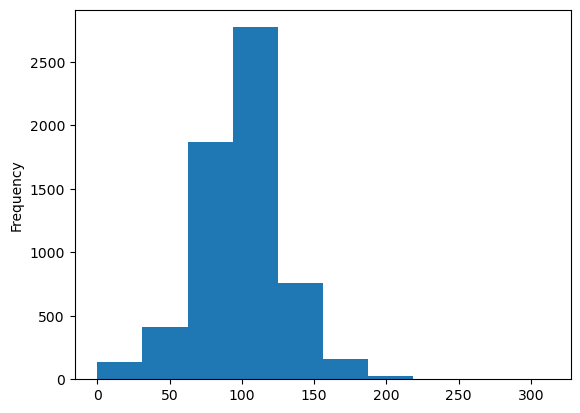

In [16]:
# make histogram with pandas
ax = df_movie['minutes'].plot(kind='hist', bins=10)

In [17]:
# get bar ranges with value_counts method and numbers of bins
df_movie['minutes'].value_counts(bins=10).sort_index()

(-0.313, 31.2]     135
(31.2, 62.4]       410
(62.4, 93.6]      1867
(93.6, 124.8]     2772
(124.8, 156.0]     766
(156.0, 187.2]     150
(187.2, 218.4]      22
(218.4, 249.6]       6
(249.6, 280.8]       2
(280.8, 312.0]       1
Name: count, dtype: int64

In [18]:
# Dealing with outliers
df_movie[(df_movie['minutes']<64.8) | (df_movie['minutes']>157.5)].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,161
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...,61
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13


### Using boxplot to identify outliers within numeric data

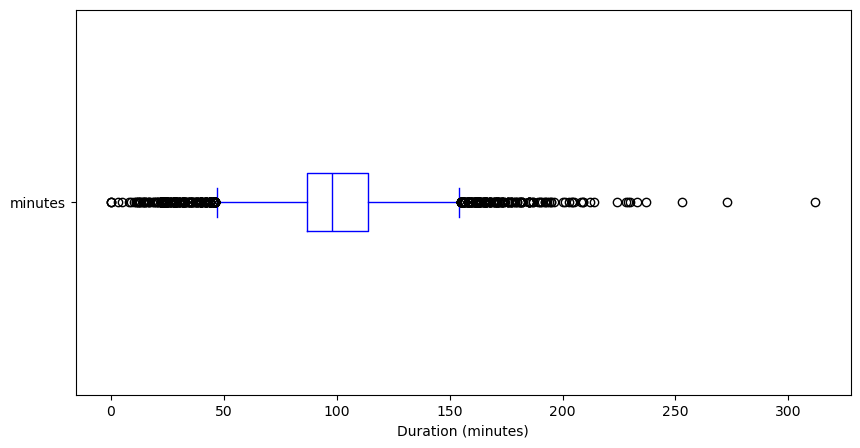

In [19]:
# make a boxplot with pandas
df_movie['minutes'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

plt.xlabel('Duration (minutes)')
plt.show()

In [20]:
# overview descriptive statitics
# IQR = Q3-Q1
min_boxplot = 87 - 1.5*(114 - 87) # Q1 - 1.5*IQR
max_boxplot = 114 + 1.5*(114 - 87) # Q3 + 1.5*IQR

print(df_movie['minutes'].describe())
print(min_boxplot)
print(max_boxplot)

count    6131.000000
mean       99.528462
std        28.369284
min         0.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: minutes, dtype: float64
46.5
154.5


In [21]:
# Dealing with Outliers
df_movie[(df_movie['minutes']<46.5) | (df_movie['minutes']>154.5)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,161
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,"September 14, 2021",2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,45
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,191
8770,s8771,Movie,Yaadein,Subhash Ghai,"Jackie Shroff, Hrithik Roshan, Kareena Kapoor,...",India,"March 1, 2018",2001,TV-14,171 min,"Dramas, International Movies, Romantic Movies",Two young lovers set out to overcome the obsta...,171
8788,s8789,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro","July 1, 2016",2015,TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art...",157


### Using bars to identify outliers within categorical data

<Axes: xlabel='rating'>

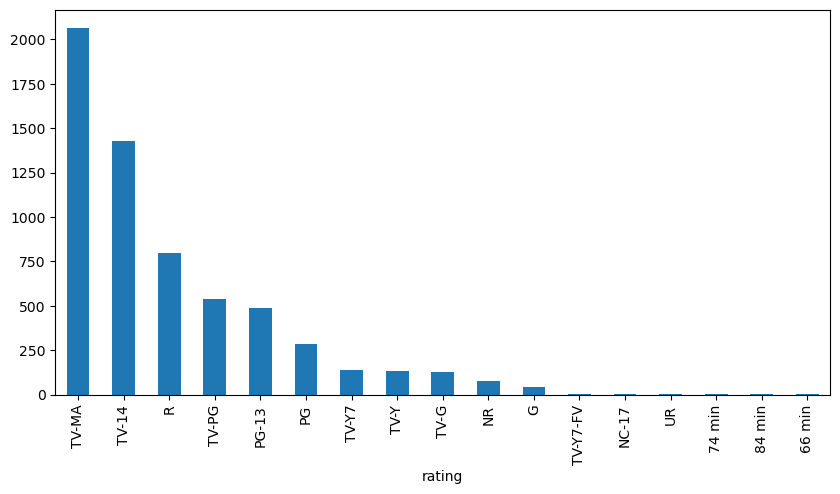

In [22]:
# make barplot with pandas
df_movie['rating'].value_counts().plot(kind='bar', figsize=(10,5))

## Text Normalization

### Dealing with inconsistent capitalization: lower(), upper(), title()

In [28]:
# change the case of text with the str attribute
df_movie['title'].str.lower()
df_movie['title'].str.upper()
df_movie['title'].str.title()

# update values
df_movie['title'] = df_movie['title'].str.upper()

# change the case of text with the apply method
df_movie['title'].apply(lambda x:x.lower())

0                   dick johnson is dead
6       my little pony: a new generation
7                                sankofa
9                           the starling
12                          je suis karl
                      ...               
8801                             zinzana
8802                              zodiac
8804                          zombieland
8805                                zoom
8806                              zubaan
Name: title, Length: 6131, dtype: object

### Remove blank spaces with strip(), lstrip(), and rstrip()

In [24]:
# how the strip method workds
movie_title = " Titanic    "

# trim leading space with lstrip()
print(movie_title.lstrip())
# trim trailing space with rstrip()
print(movie_title.rstrip())
# trim leading and trailing space with strip()
print(movie_title.strip())

Titanic    
 Titanic
Titanic


In [29]:
# get rid of leading and trailing white spaces with the strip() method
df_movie['title'] = df_movie['title'].str.strip()

# get rid of leading and trailing white spaces with the apply method
df_movie['title'].apply(lambda x:x.strip())

0                   DICK JOHNSON IS DEAD
6       MY LITTLE PONY: A NEW GENERATION
7                                SANKOFA
9                           THE STARLING
12                          JE SUIS KARL
                      ...               
8801                             ZINZANA
8802                              ZODIAC
8804                          ZOMBIELAND
8805                                ZOOM
8806                              ZUBAAN
Name: title, Length: 6131, dtype: object

### Replace strings with replace() or sub()

In [43]:
# remove punctuation signs with the str.replace() method and regex
df_movie['title'].str.replace('[^\w\s]', '', regex=True)

# remove punctuation signs with the replace() method and regex
df_movie['title'].replace('[^\w\s]', '', regex=True)

# difference between str.replace() and replace()
# str.replace(): perform string or regex substitution on string data.
# replace():  can replace any type of data

df_movie['title'].replace('J', 2, regex=True)
df_movie['title'].str.replace('D', 'I', regex=True)

# remove punctuation signs with the re.sub() function via the apply method
import re
df_movie['title'].apply(lambda x:re.sub('[^\w\s]','',x))

0                  DICK JOHNSON IS DEAD
6       MY LITTLE PONY A NEW GENERATION
7                               SANKOFA
9                          THE STARLING
12                         JE SUIS KARL
                     ...               
8801                            ZINZANA
8802                             ZODIAC
8804                         ZOMBIELAND
8805                               ZOOM
8806                             ZUBAAN
Name: title, Length: 6131, dtype: object